In [2]:
import healpy as hp, numpy as np, prjlib, curvedsky, pickle, plottools as pl
from matplotlib.pyplot import *

In [3]:
p = prjlib.analysis_init(t='la',freq='coadd',fltr='cinv',ntype='base_roll50')
Tcmb = 2.72e6
lfunc = np.ones(p.lmax+1)
lfunc[:2000] = 0.

In [14]:
M, wn = prjlib.window('la',ascale=0.)

In [12]:
walm = pickle.load(open(p.fcmb.alms['o']['T'][2],"rb"))[0]
cl = curvedsky.utils.alm2cl(p.lmax,walm)

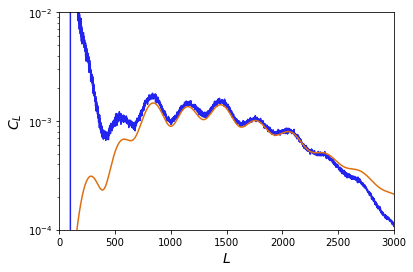

In [6]:
l = np.linspace(0,p.lmax,p.lmax+1)
pl.plot_1dstyle(xmin=2,xmax=3000,ymin=1e-4,ymax=1e-2,ylog=True)
plot(l,l**4*cl/0.29)
plot(l,l**4*p.lcl[0,:p.lmax+1])

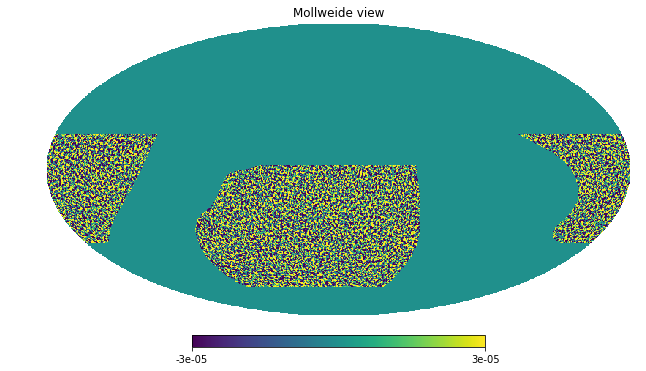

In [16]:
Wmap = M*curvedsky.utils.hp_alm2map(2048,2048,2048,walm[:2049,:2049])
hp.mollview(Wmap,min=-3e-5,max=3e-5)

In [4]:
nmap0 = hp.fitsfunc.read_map(p.fcmb.nois[1],field=0,verbose=False)/Tcmb
smap0 = hp.fitsfunc.read_map(p.fcmb.lcdm[1],field=0,verbose=False)/Tcmb

In [7]:
Wsmap = W * smap0
Wnmap = W * nmap0
WSmap = curvedsky.utils.map_mul_lfunc(p.nside,Wsmap,p.lmax,lfunc)
WNmap = curvedsky.utils.map_mul_lfunc(p.nside,Wnmap,p.lmax,lfunc)

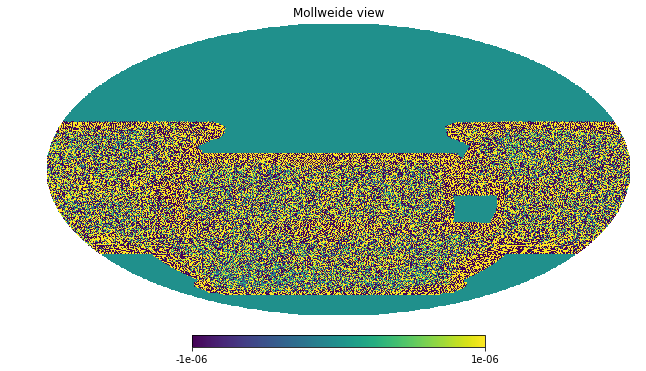

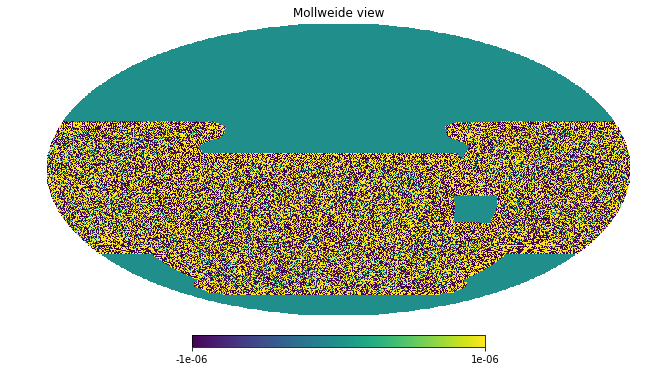

In [8]:
hp.mollview(M*WNmap/(W+1e-30),min=-1e-6,max=1e-6)
hp.mollview(M*(WSmap+WNmap)/(W+1e-30),min=-1e-6,max=1e-6)

In [9]:
pid = prjlib.analysis_init(t='id',ntype='cv',snmin=1,snmax=10)
Tilm = pickle.load(open(pid.fcmb.alms['o']['T'][1],"rb"))
p145= prjlib.analysis_init(t='la',freq='coadd',ntype='base')
l, TT = np.loadtxt(p145.fcmb.scl['s'],unpack=True,usecols=(0,1))
l, TN = np.loadtxt(p145.fcmb.scl['n'],unpack=True,usecols=(0,1))

In [10]:
pla = prjlib.analysis_init(t='la',freq='coadd')
Woalm = pickle.load(open(pla.fcmb.alms['o']['T'][1],"rb"))

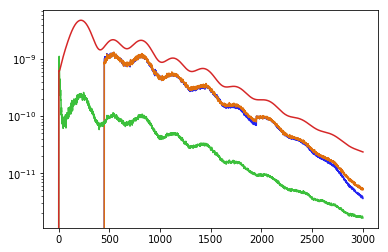

In [13]:
Cl = curvedsky.utils.alm2cl(3000,Woalm[:3001,:3001])
Xl = curvedsky.utils.alm2cl(3000,Woalm[:3001,:3001],Tilm[:3001,:3001])
lmax = 3000
L = np.linspace(0,lmax,lmax+1)
yscale('log')
Tlm = pickle.load(open('../../data/sodelens/trash/T_lcoadd_001.pkl',"rb"))[:lmax+1,:lmax+1]
cl = curvedsky.utils.alm2cl(lmax,Tlm)
xl = curvedsky.utils.alm2cl(lmax,Tlm,Tilm[:lmax+1,:lmax+1])
il = curvedsky.utils.alm2cl(lmax,Tilm[:lmax+1,:lmax+1])
plot(L,L**2*cl)
plot(L,L**2*xl)
plot(L,L**2*Cl)
plot(L,L**2*p.lcl[0,:lmax+1])

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


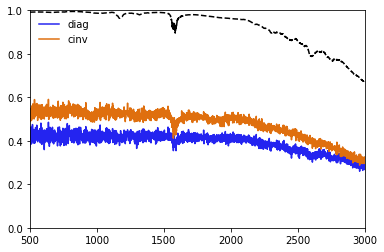

In [14]:
xlim(500,3000)
ylim(0.,1.)
plot(Xl**2/Cl/il,label='diag')
plot(xl**2/cl/il,label='cinv')
plot(TT/(TT+TN+1e-30),'k--')
legend()

In [15]:
Wcmap = curvedsky.utils.hp_alm2map(p.nside,3000,3000,Tlm[:3001,:3001])

In [16]:
Woalm[:500,:] = 0.
Womap = curvedsky.utils.hp_alm2map(p.nside,3000,3000,Woalm[:3001,:3001])

In [17]:
Tilm[:500,:] = 0.
Wimap = curvedsky.utils.hp_alm2map(p.nside,3000,3000,Tilm[:3001,:3001])

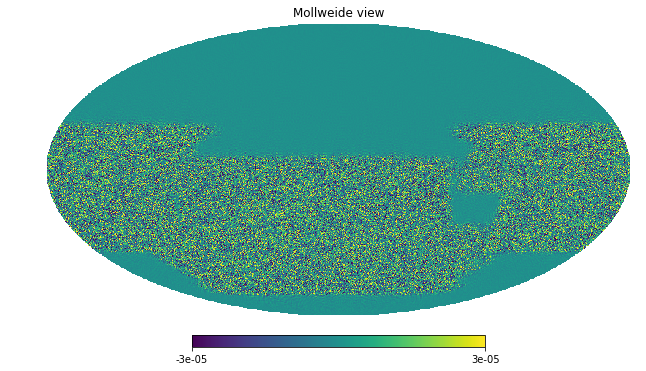

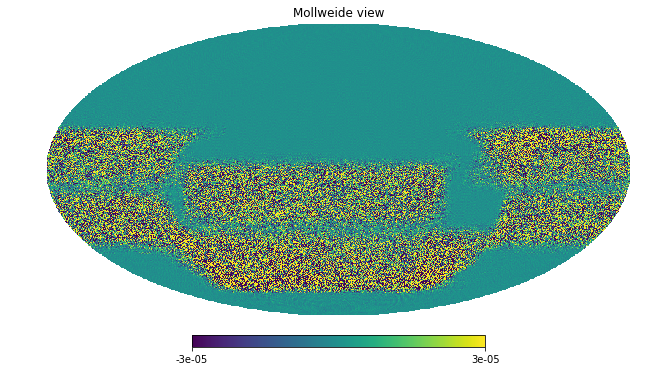

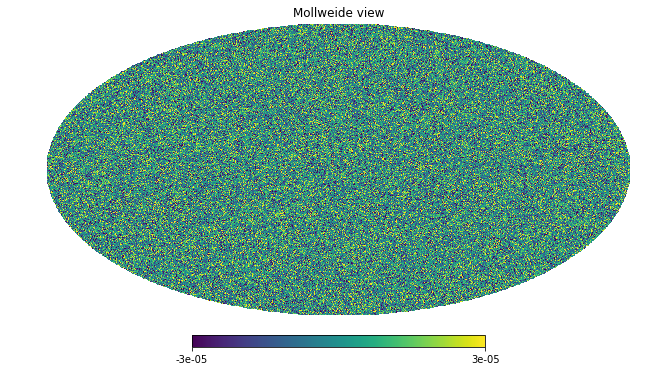

In [18]:
hp.mollview(Wcmap,min=-3e-5,max=3e-5)
hp.mollview(Womap/wn[1],min=-3e-5,max=3e-5)
hp.mollview(Wimap,min=-3e-5,max=3e-5)

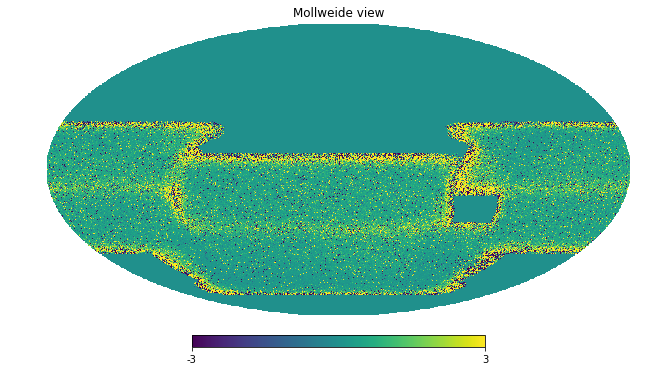

In [19]:
hp.mollview(M*Wcmap/(Womap/wn[1]+1e-30),min=-3,max=3)

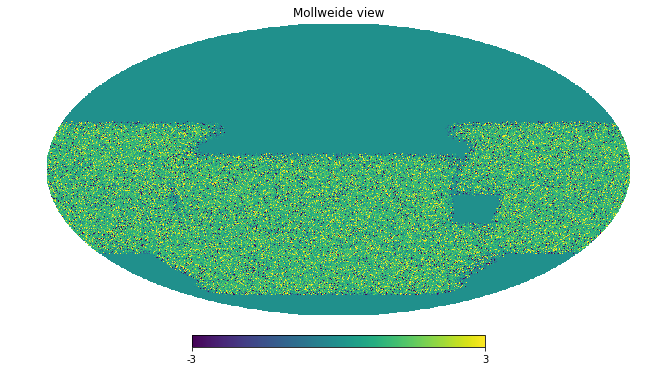

In [20]:
hp.mollview(M*Wcmap/(Wimap+1e-30),min=-3,max=3)

In [ ]:
#Nij = pickle.load(open('../../data/sodelens/trash/nij_l1000-2000_nu145.pkl',"rb"))
Nij = pickle.load(open('../../data/sodelens/trash/nij_l1001-1500_nu145.pkl',"rb"))
print(np.max(Nij))
hp.mollview(Nij,min=0,max=5e11)

In [ ]:
hp.mollview(W*(10./Tcmb*np.pi/10800)**(-2))

In [ ]:
#import sys
#sys.path.append('/global/homes/t/toshiyan/Work/Lib/actlib/PySM_public/')
#sys.path.append('/global/homes/t/toshiyan/Work/Lib/actlib/so_pysm_models/')
#sys.path.append('/global/homes/t/toshiyan/.local/cori/3.6-anaconda-4.4/lib/python3.7/site-packages/')
#from mapsims import SONoiseSimulator
#from mapsims import Channel
#ch  = Channel(telescope='LA',band=145)
#sim = SONoiseSimulator(4096,apply_beam_correction=False)
#nT, nQ, nU = SONoiseSimulator.simulate(sim,ch)

In [ ]:
l = np.linspace(0,lmax,lmax+1)
cl = curvedsky.utils.alm2cl(lmax,Wcalm[:lmax+1,:lmax+1])/wn[2]
xl = curvedsky.utils.alm2cl(lmax,Wcalm[:lmax+1,:lmax+1],Tilm[:lmax+1,:lmax+1])/wn[1]
Cl = curvedsky.utils.alm2cl(lmax,Woalm[:lmax+1,:lmax+1])/wn[2]
Xl = curvedsky.utils.alm2cl(lmax,Woalm[:lmax+1,:lmax+1],Tilm[:lmax+1,:lmax+1])/wn[1]
il = curvedsky.utils.alm2cl(lmax,Tilm[:lmax+1,:lmax+1])
pl.plot_1dstyle(xmin=2,xmax=3000,ymin=1e-24,ymax=1e-12,ylog=True)
plot(l,cl,label='cinv')
plot(l,Cl,label='diag')
plot(l,xl,label='cinv cross')
plot(l,Xl,label='diag cross')
plot(il,color='k')
plot(l,cl*(p.lcl[0,:lmax+1]/xl)**2,label='cinv correct')
plot(l,Cl*(p.lcl[0,:lmax+1]/Xl)**2,label='diag correct')
plot(TT**2/(TT+TN+1e-30),color='k',ls='--')
legend()

In [ ]:
plot(xl**2/cl/il)
plot(Xl**2/Cl/il)
plot(TT/(TT+TN+1e-30))